In [214]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('on')
    plt.show()

## 1. Drawing Shapes

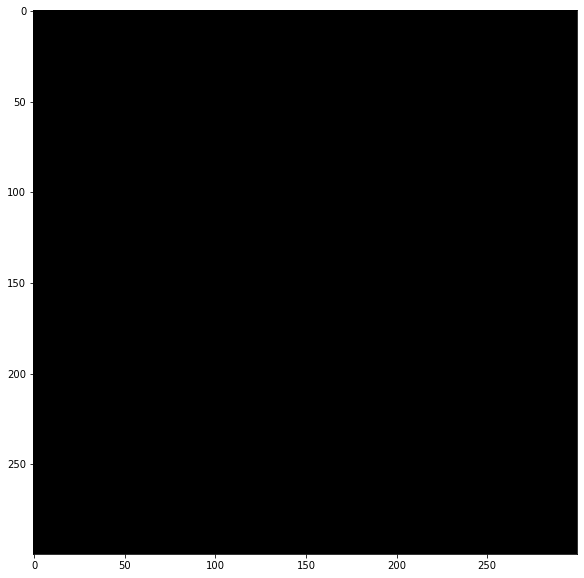

In [216]:
canvas = np.zeros((300, 300, 3), dtype="uint8") #all integers and all of them are 0
show_image(canvas)

### 1.1 Drawing Lines

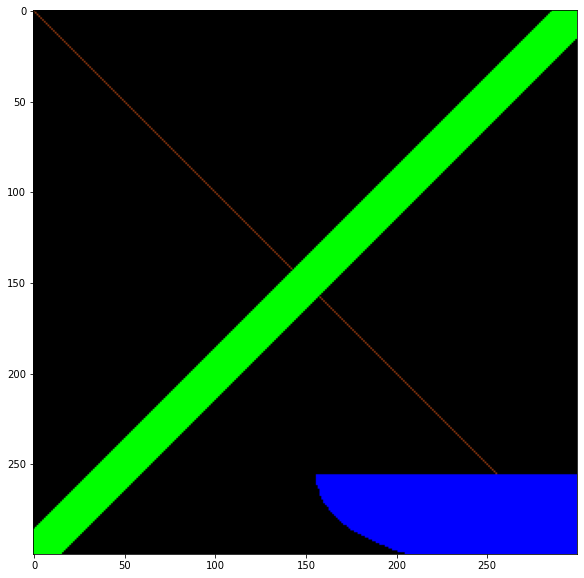

In [217]:
#remember cv2 works in B G R 
green = (0, 255, 0)
red = (15, 54, 138)
cv2.line(canvas, (0, 0), (300, 300), red, 1)

# first entry is the y-axis
cv2.ellipse(canvas,(256,256),(100,50),0,0,180,255,-1)
cv2.line(canvas, (300, 0), (0, 300), green, 20)
show_image(np.flip(canvas, axis=2))

### 1.2 Drawing Rectangles

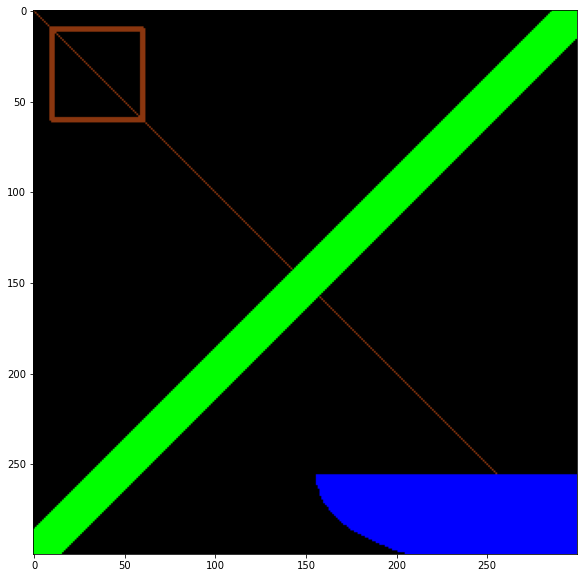

In [218]:
#you can take a copy of the canvas and you can ddraw on the copy
# canvas_copy = canvas.copy()

cv2.rectangle(canvas, (10, 10), (60, 60), red, 2)
show_image(np.flip(canvas, axis=2))

### 1.3 Drawing Circles

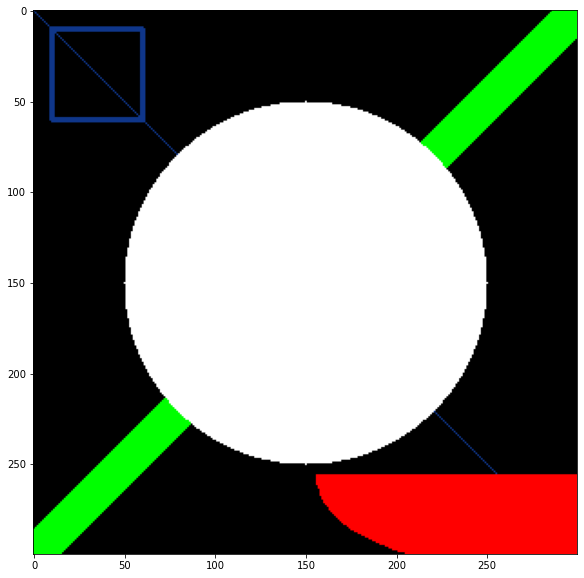

In [219]:
clone = canvas.copy() #take a copy of the canvas
white = (255, 255, 255) # define the white colours
radius = 100
#cordinate of centre point
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
cv2.circle(clone, (centerX, centerY), radius, white, -1) # ticknes -1
show_image(clone)

### HOMEWORK: Draw Random shapes

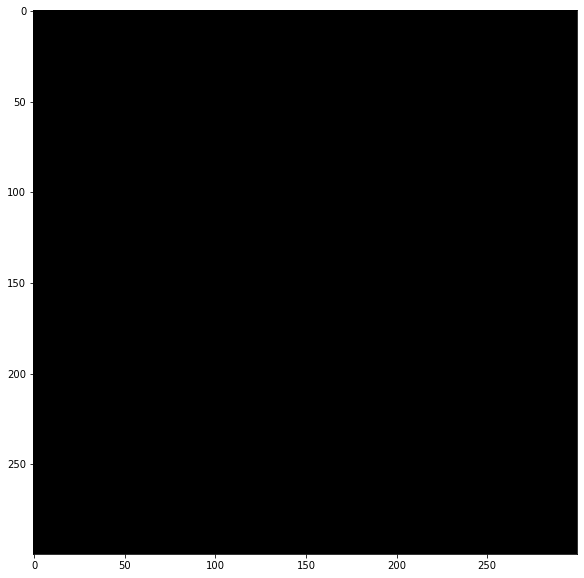

In [220]:
# TODO: Use a random number generator to draw random number of shapes in various sizes over the canvas
import random
def display_canvas(image, cmap = None, fig_size = (10,10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('on')
    plt.show()

canvas = np.zeros((300, 300, 3), dtype="uint8")
display_canvas(canvas)


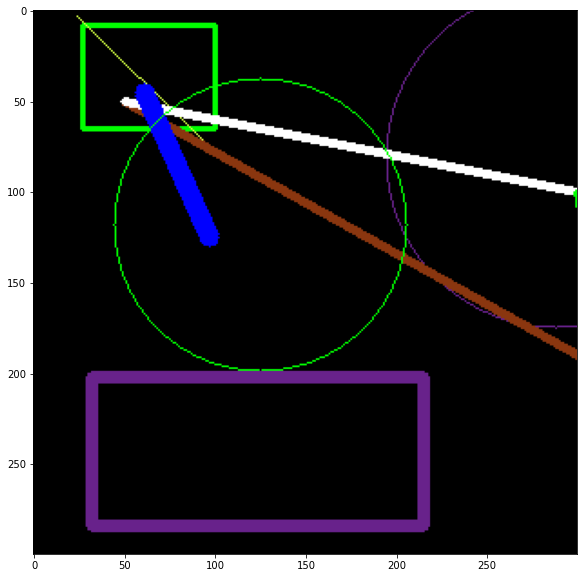

In [222]:
# TODO: Use a random number generator to draw random number of shapes in various sizes over the canvas
import random
def display_canvas(image, cmap = None, fig_size = (10,10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('on')
    plt.show()

canvas = np.zeros((300, 300, 3), dtype="uint8")
display_canvas(canvas)

def pick_colour():
    colours = ["red", "green", "purple", "blue", "yellow", "brown", "white"]
    pick = random.choice(colours)
    if pick == "red":
        return (0, 0, 255)
    elif pick == "green":
        return (0 , 255, 0)
    elif pick == "blue":
        return (255, 0 , 0)
    elif pick == "yellow":
        return (67, 255, 211)
    elif pick == "brown":
        return (15, 54, 138)
    elif pick == "white":
        return (255, 255, 255)
    elif pick == "purple":
        return (139, 34, 104)


def pick_tickness(min, max):
    return random.randint(min, max)

def pick_coordinates(min, max):
    x = random.randint(min, max)
    y =  random.randint(min, max)
    return (x, y)

# generate random number, that will correspong to the number of shapes that will appear
# on the canvas. we will consider up to 10 shapes

num = random.randint(1,10)

curves_tickness = random.randint(-1, 5)
radius = random.randint(10,150)


if num <= 3:
    # draw something  2 lines and one shape
    cv2.circle(canvas, pick_coordinates(10, 200), radius, pick_colour(), curves_tickness)
    cv2.line(canvas, pick_coordinates(1, 300), pick_coordinates(0, 200), pick_colour(), 1)
    cv2.line( canvas, pick_coordinates(0, 200), pick_coordinates(0, 250), pick_colour(), pick_tickness(1, 7))

if num > 3 and num <= 5:
    # draw something 1 line, 1 rectangle and 1 circle
     cv2.line(canvas, pick_coordinates(23, 146), pick_coordinates(0, 300), pick_colour(), pick_tickness(3, 6))
     cv2.circle(canvas, pick_coordinates(10, 135), radius, pick_colour(), curves_tickness)
     cv2.line(canvas, pick_coordinates(0, 300), pick_coordinates(0, 244), pick_colour(), pick_tickness(6, 8))
     cv2.rectangle(canvas,pick_coordinates(100, 255), pick_coordinates(0, 300), pick_colour(), pick_tickness(1, 15))
if num > 5 and num <= 7:
    # draw something two circle, 2 rectangles
     cv2.circle(canvas, pick_coordinates(0, 300), radius, pick_colour(), curves_tickness)
     cv2.rectangle(canvas, pick_coordinates(0, 29), pick_coordinates(4, 266), pick_colour(), pick_tickness(1, 14))
     cv2.line(canvas,pick_coordinates(34, 100), pick_coordinates(2, 34), pick_colour(), 1)

if num > 7:
    #draw something else 1 circle, 1 rectangle, triangle and a line
     # Three vertices(tuples) of the triangle
     p1 = (100 + x_rand, 200)
     p2 = (50, 50)
     p3 = (300, 100)

     cv2.line(canvas, p1, p2, pick_colour(), 3)
     cv2.line(canvas, p2, p3, pick_colour(), 3)
     cv2.line(canvas, p1, p3, pick_colour(), 3)

     cv2.line( canvas,  pick_coordinates(3, 87),  pick_coordinates(0, 300), pick_colour(), pick_tickness(7, 10))
     cv2.circle(canvas, pick_coordinates(3, 200), radius, pick_colour(), curves_tickness)
     cv2.rectangle(canvas, pick_coordinates(0, 300), pick_coordinates(45, 245), pick_colour(), pick_tickness(4, 9))

display_canvas(np.flip(canvas, axis = 2))                                                              

## 2. Masks

### 2.1: Drawing Shape Masks

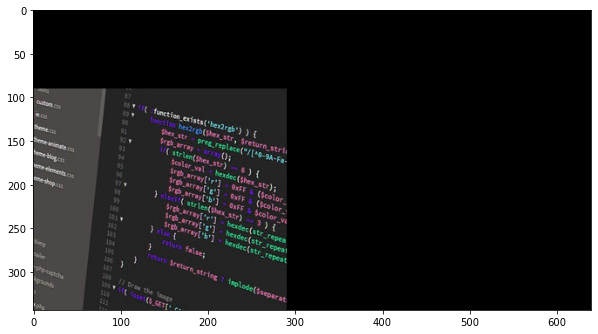

In [234]:
image = cv2.imread('../img/coding.png')
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)

masked = cv2.bitwise_and(image, image, mask=mask)
show_image(masked) # the bt is taken ou for you

### 2.2: Extracting Objects from Images

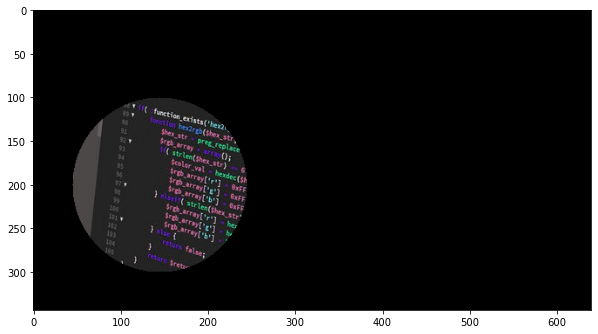

In [226]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
show_image(masked)

### EXERCISE: Crop Out a muffin from this image using a rectangular mask

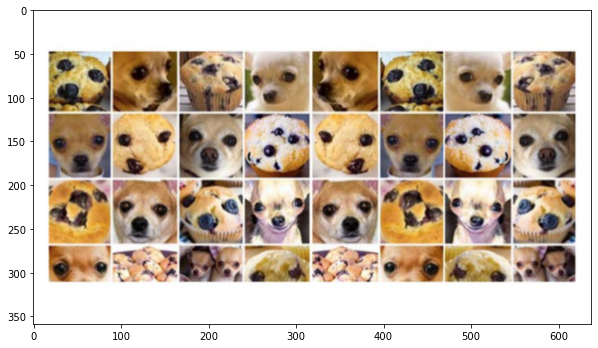

In [227]:
image = np.flip(cv2.imread('../img/dog_muffin.jpg'), axis=2)
show_image(image)

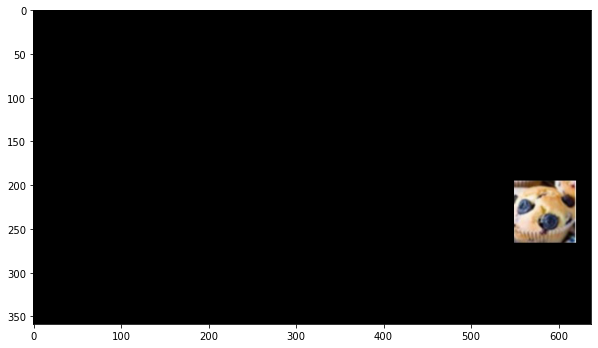

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

def display_canvas(image, cmap = None, fig_size = (10,10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('on')
    plt.show()

def saving_image(image, output):
    #save your image to output path using opencv
    path = output
    cv2.imwrite(os.path.join(path,'crop_out_muffin.jpg'), image)
    cv2.waitKey(0)


image = np.flip(cv2.imread('../img/dog_muffin.jpg'), axis=2)
# display_canvas(image)

mask = np.zeros(image.shape[:2], dtype='uint8')
cv2.rectangle(mask, (550,195), (620, 265), 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
display_canvas(masked)
masked = np.flip(masked, axis =2)
saving_image(masked, '../img')

In [237]:
# %load ../solutions/dog_muffin.py


## 3. Geometrical Transformations

### 3.1 Translation

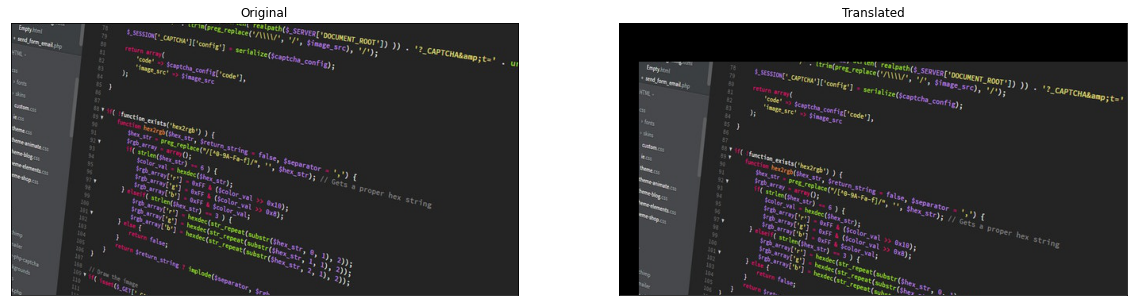

In [238]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(shifted)
plt.title('Translated'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.2 Rotation

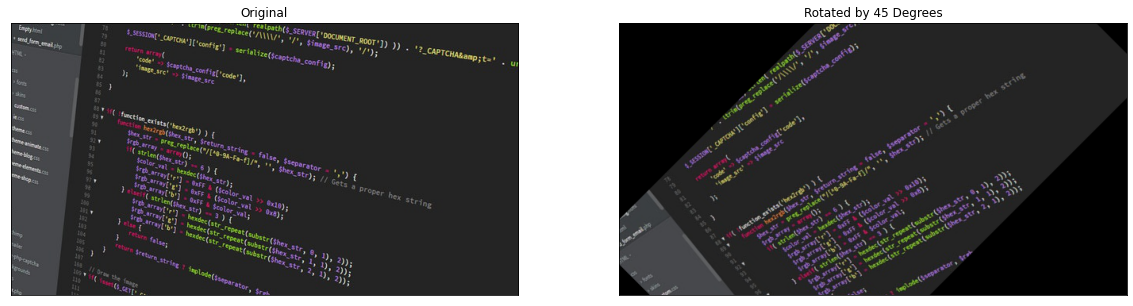

In [239]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
(h, w) = image.shape[:2]
(cX, cY) = (w / 2, h / 2)

M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(rotated)
plt.title('Rotated by 45 Degrees'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.3 Scaling

(344, 640)


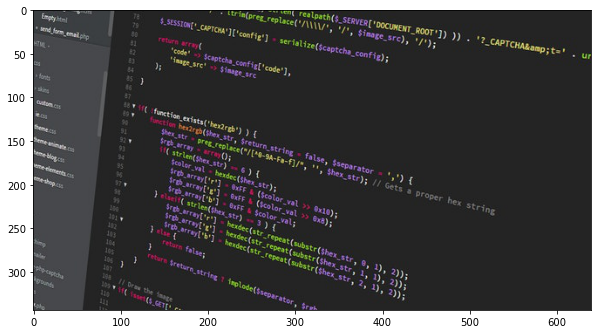

In [240]:
print(cv2.imread('../img/coding.png').shape[:2])
show_image(image)

# if you scale up you need more pixels

Original shape: (344, 640, 3) vs Resized shape (688, 1280, 3)


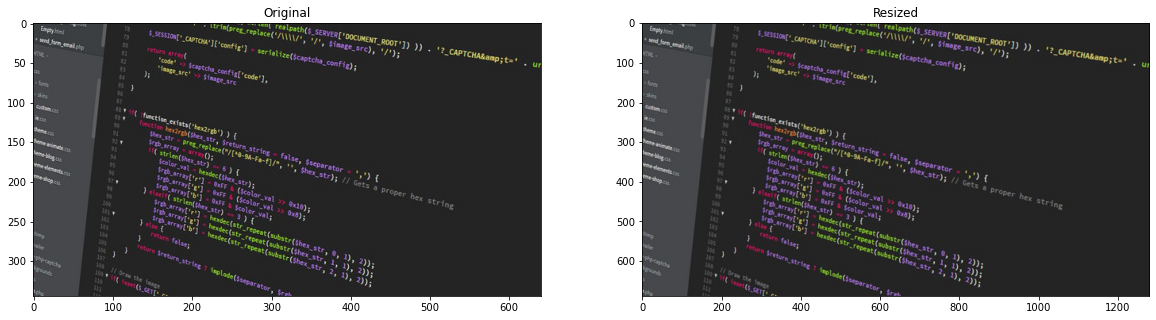

In [242]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
height, width = image.shape[:2]
resized_width = 1280

# calculating ratio of new image to old image
ratio = resized_width / width
dim = (resized_width, int(height * ratio))

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

print(f'Original shape: {image.shape} vs Resized shape {resized.shape}')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(image) 
plt.title('Original')
plt.subplot(1,2,2), plt.imshow(resized)
plt.title('Resized')
plt.show()

Original shape: (475, 600, 3) vs Resized shape (688, 869, 3)


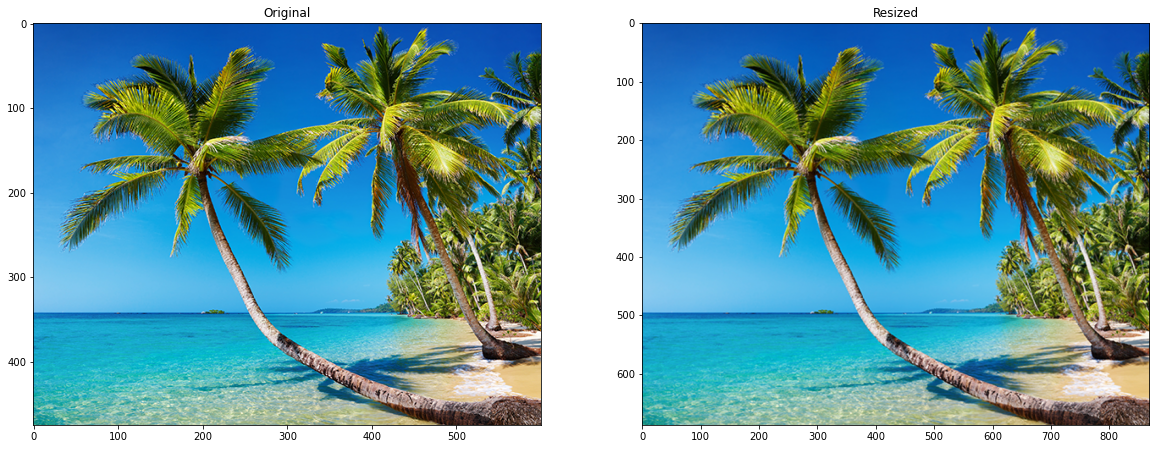

In [245]:
image = np.flip(cv2.imread('../img/beach.png'), axis =2)
height, width = image.shape[:2]
resized_height = 688

# calculating ratio of new image to old image
ratio = resized_height / height
dim = (int(width * ratio), resized_height)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
# interpulaton function is to fill up all the pixels.
# the quality will drop 

print(f'Original shape: {image.shape} vs Resized shape {resized.shape}')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(image) 
plt.title('Original')
plt.subplot(1,2,2), plt.imshow(resized)
plt.title('Resized')
plt.show()

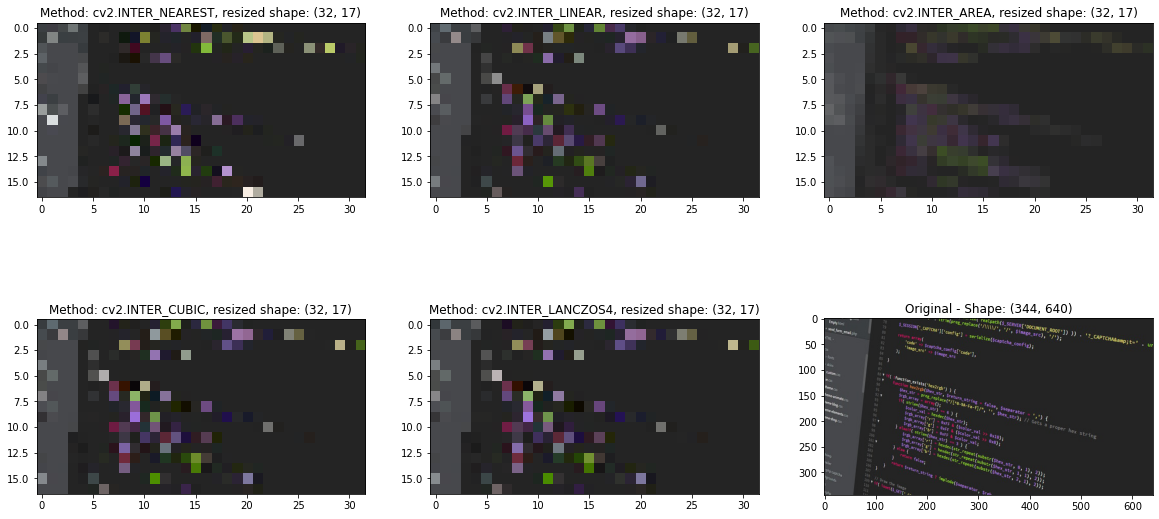

In [246]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)

# Resizing the image - Note, required dimension tuple can only accept integers (pixel locations)
# Note: Image shape must be reversed as order of width and height is different since we are flipping the image matrix above
resize_times = 0.05
dim = tuple(map(lambda x: int(x * resize_times), reversed(image.shape[:2])))

# construct the list of interpolation methods
methods = [
    ("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
    ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
    ("cv2.INTER_AREA", cv2.INTER_AREA),
    ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
    ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]
 
plt.figure(figsize=(20,10))

# loop over the interpolation methods
for i, (name, method) in enumerate(methods):
    # increase the size of the image by 3x using the current interpolation method
    resized = cv2.resize(image, dim, interpolation=method)
    plt.subplot(2,3,i+1),plt.imshow(resized)
    plt.title(f'Method: {name}, resized shape: {dim}')

plt.subplot(2,3,6), plt.imshow(image) 
plt.title(f'Original - Shape: {image.shape[:2]}')
    
plt.show()

### 3.4 Flipping

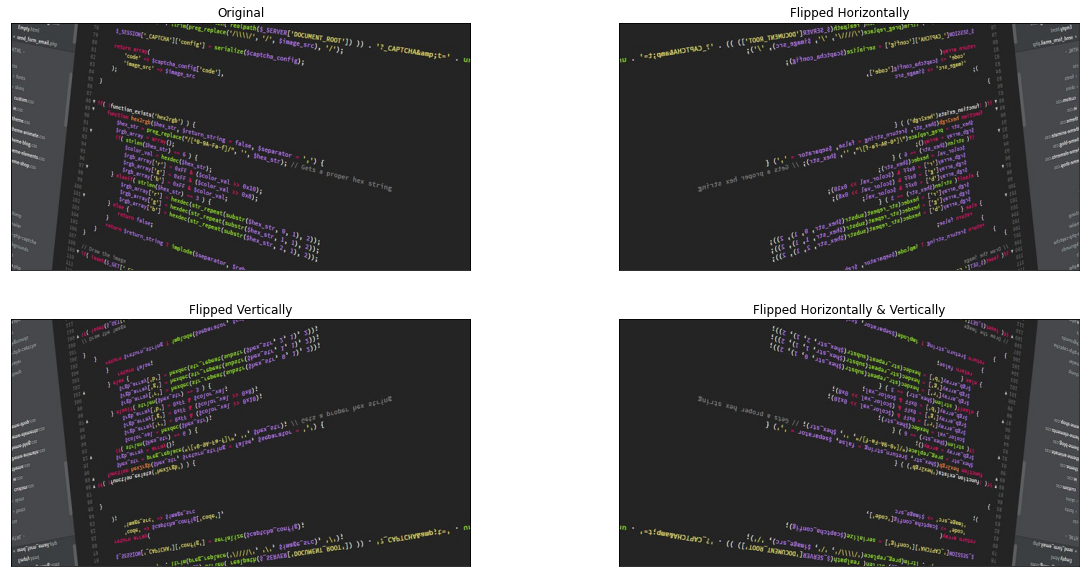

In [247]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)

# flip the image horizontally
hflipped = cv2.flip(image, 1)
 
# flip the image vertically
vflipped = cv2.flip(image, 0)
 
# flip the image along both axes
hvflipped = cv2.flip(image, -1)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(hflipped)
plt.title('Flipped Horizontally'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(vflipped)
plt.title('Flipped Vertically'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(hvflipped)
plt.title('Flipped Horizontally & Vertically'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.5 Cropping

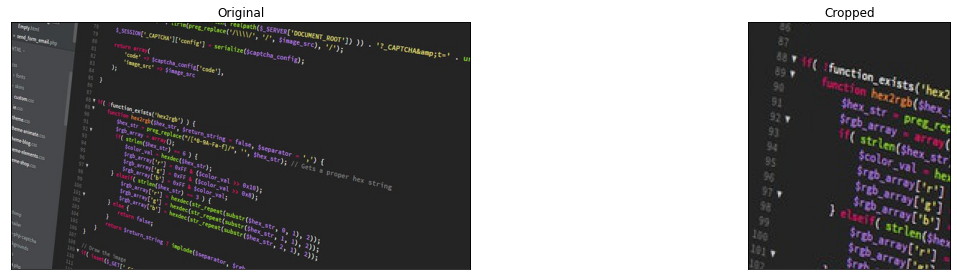

In [249]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
cropped = image[85:250, 85:220] # h, w 

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(cropped)
plt.title('Cropped'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.6 Image Arithmetic

Original [133 117 192], Added: [233 217 255]


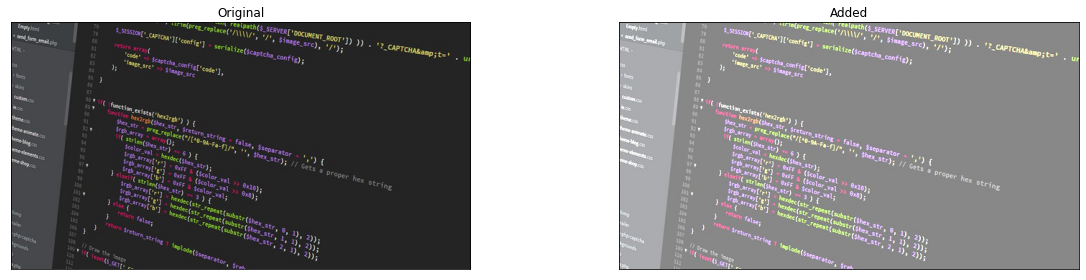

In [301]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
print(f'Original {image[150, 155]}, Added: {added[150, 155]}')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(added)
plt.title('Added'), plt.xticks([]), plt.yticks([])
plt.show()

# the biggest value a pixel can be set at is 255

Original [35 39 42], Substracted: [0 0 0]


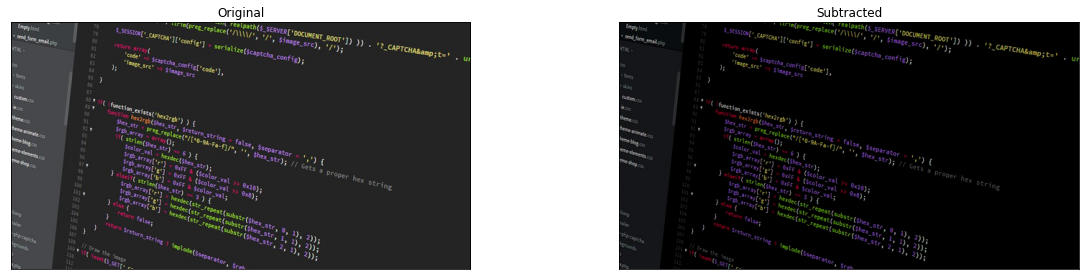

In [252]:
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
print(f'Original {image[10, 10]}, Substracted: {subtracted[10, 10]}')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(subtracted)
plt.title('Subtracted'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.7 Bitwise Operations

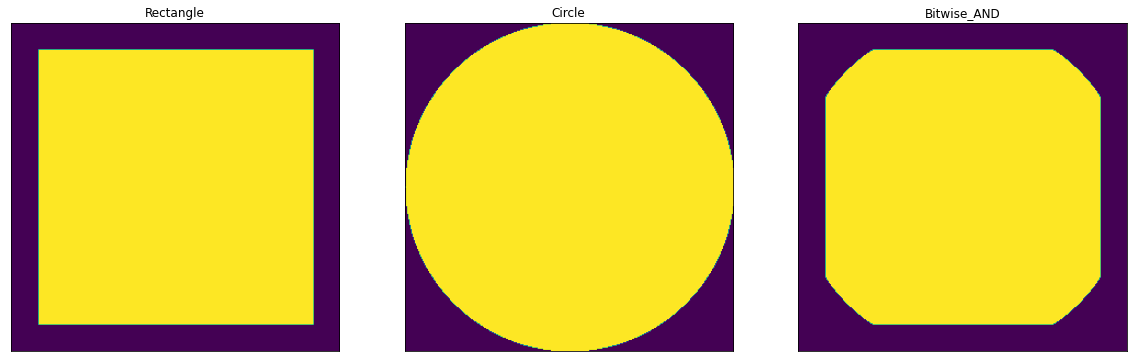

In [253]:
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

bitwise_and = cv2.bitwise_and(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_and)
plt.title('Bitwise_AND'), plt.xticks([]), plt.yticks([])
plt.show()

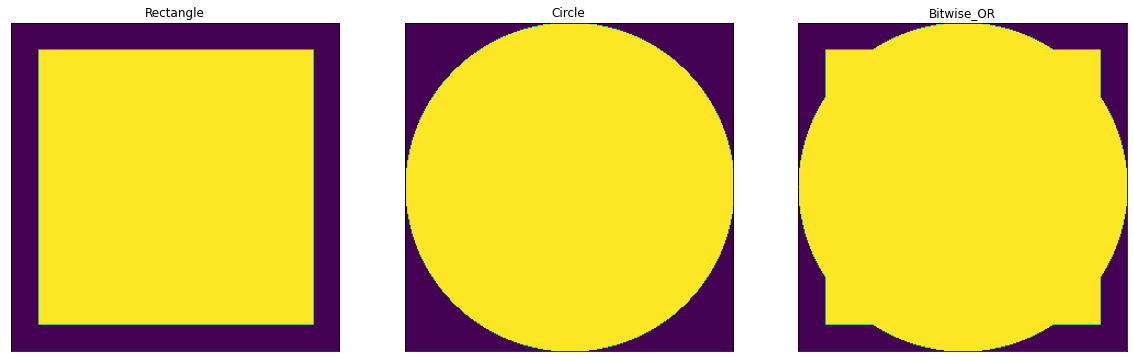

In [254]:
bitwise_or = cv2.bitwise_or(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_or)
plt.title('Bitwise_OR'), plt.xticks([]), plt.yticks([])
plt.show()

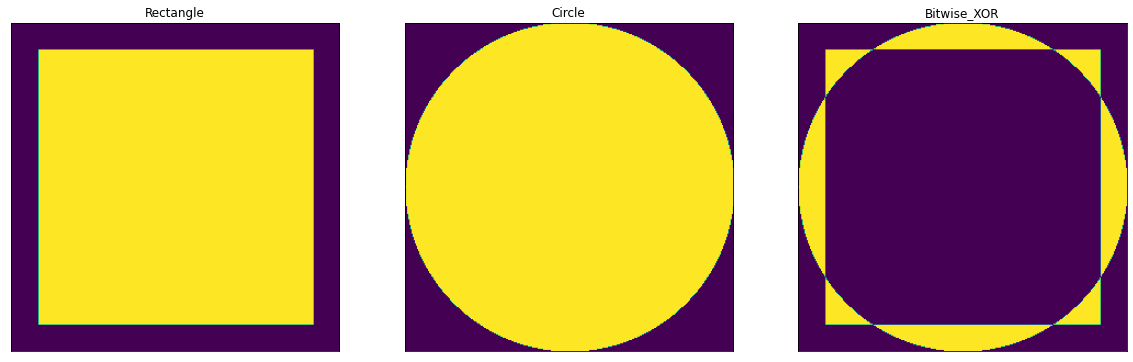

In [255]:
bitwise_xor = cv2.bitwise_xor(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_xor)
plt.title('Bitwise_XOR'), plt.xticks([]), plt.yticks([])
plt.show()

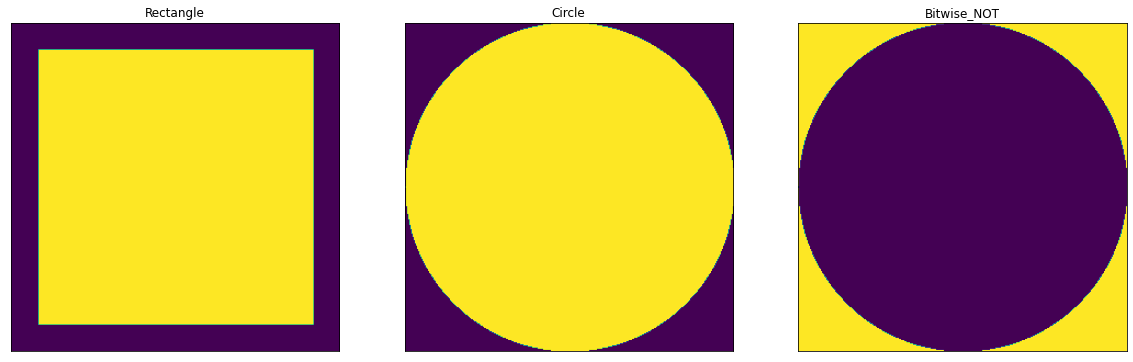

In [256]:
bitwise_not = cv2.bitwise_not(circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_not)
plt.title('Bitwise_NOT'), plt.xticks([]), plt.yticks([])
plt.show()

### Homework: Complex Transformations - Apply multiple transformations at once on one image

ROTATING....


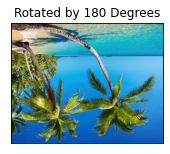

CROPPING...


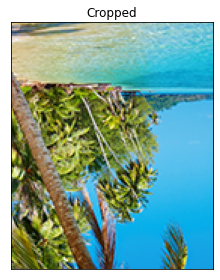

SCALING...
Original shape: (165, 135, 3) vs Resized shape (1013, 1280, 3)


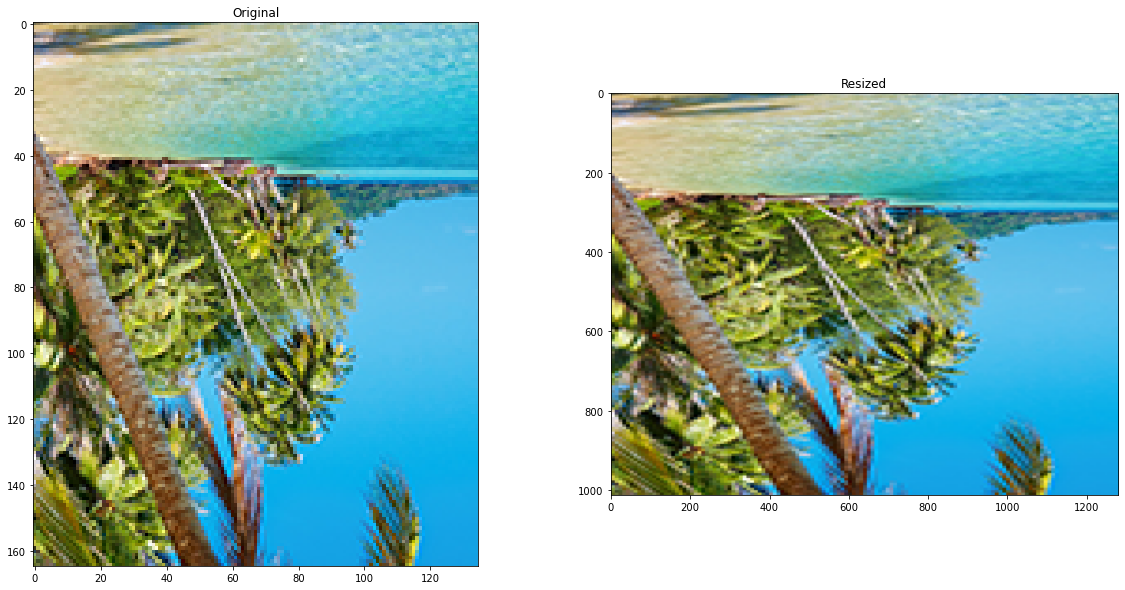

TRANSLATING...


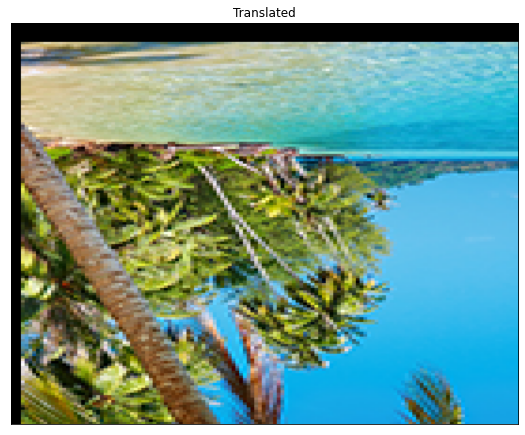

MASKING...


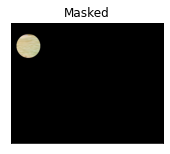

In [293]:
# TODO: Your code below
# create a pipeline where you apply different transformations

angles= [25, 45, 60, 120, 180, 360, -45, -90 ]
# transformations = ["rotate", "cropping", "scale", "translate", "mask", "brighten" ]
# "rotate", "cropping", "scale", "translate", "mask"
def pipeline_one(path):
    image = np.flip(cv2.imread(path), axis =2)
    # rotate
    print("ROTATING....")
    (height, width) = image.shape[:2]
    (cX, cY) = (width / 2, height / 2 )
    angle = random.choice(angles)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    rotated = cv2.warpAffine(image, M, (width, height))
    plt.subplot(1,2,2),plt.imshow(rotated)
    plt.title("Rotated by {} Degrees".format(angle)), plt.xticks([]), plt.yticks([])
    plt.show()

    # crop
    print("CROPPING...")
    cropped = rotated[85:250, 85:220] # h, w 
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,2),plt.imshow(cropped)
    plt.title('Cropped'), plt.xticks([]), plt.yticks([])
    plt.show()

    # scale
    print("SCALING...")
    resized_width = 1280

    # calculating ratio of new image to old image
    ratio = resized_width / width
    dim = (resized_width, int(height * ratio))

    resized = cv2.resize(cropped, dim, interpolation=cv2.INTER_AREA)

    print(f'Original shape: {cropped.shape} vs Resized shape {resized.shape}')
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1), plt.imshow(cropped) 
    plt.title('Original')
    plt.subplot(1,2,2), plt.imshow(resized)
    plt.title('Resized')
    plt.show()
    
    # translate
    print("TRANSLATING...")
    M = np.float32([[1, 0, 25], [0, 1, 50]])
    shifted = cv2.warpAffine(resized, M, (resized.shape[1], resized.shape[0]))

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2),plt.imshow(shifted)
    plt.title('Translated'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    # mask
    print("MASKING...")

    mask = np.zeros(shifted.shape[:2], dtype="uint8")
    cv2.circle(mask, (145, 200), 100, 255, -1)
    masked = cv2.bitwise_and(shifted, shifted, mask=mask)
    plt.subplot(1,2,2),plt.imshow(masked)
    plt.title("Masked"), plt.xticks([]), plt.yticks([])
    plt.show()
    
pathImage = '../img/beach.png'

pipeline_one(pathImage)

CROPPING...


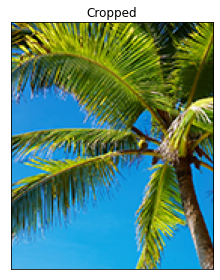

ROTATING....


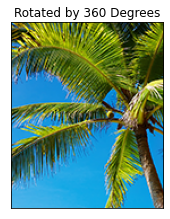

TRANSLATING...


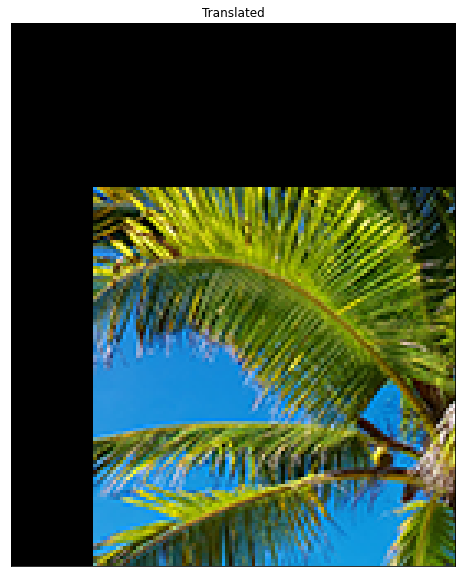

BRIGHTEN...


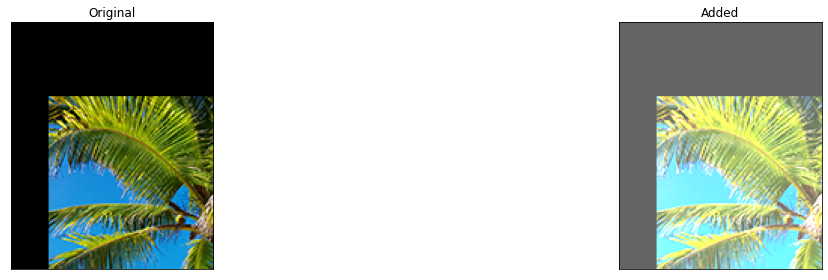

In [297]:
# Pipeline 2
# "crop", "rotate", "translate", "brighten",
    
def pipeline_two(path):
    image = np.flip(cv2.imread(path), axis =2)
    #crop
    print("CROPPING...")
    cropped = image[85:250, 85:220] # h, w 
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,2),plt.imshow(cropped)
    plt.title('Cropped'), plt.xticks([]), plt.yticks([])
    plt.show()

    # rotate
    print("ROTATING....")
    (height, width) = cropped.shape[:2]
    (cX, cY) = (width / 2, height / 2 )
    angle = random.choice(angles)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    rotated = cv2.warpAffine(cropped, M, (width, height))
    plt.subplot(1,2,2),plt.imshow(rotated)
    plt.title("Rotated by {} Degrees".format(angle)), plt.xticks([]), plt.yticks([])
    plt.show()
    # translate
    print("TRANSLATING...")
    M = np.float32([[1, 0, 25], [0, 1, 50]])
    shifted = cv2.warpAffine(rotated, M, (rotated.shape[1], rotated.shape[0]))

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2),plt.imshow(shifted)
    plt.title('Translated'), plt.xticks([]), plt.yticks([])
    plt.show()
    # brighten
    print("BRIGHTEN...")
    M = np.ones(shifted.shape, dtype = "uint8") * 100
    added = cv2.add(shifted, M)
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,1),plt.imshow(shifted)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(added)
    plt.title('Added'), plt.xticks([]), plt.yticks([])
    plt.show()



    
pathImage = '../img/beach.png'

pipeline_two(pathImage)


### PROJECT: Write a script that would take an image as input and produces 10 random new geometrically transformed images.

In [280]:
# random_geometrical_tranformations.py
# Description: Applying multiple tranformations at once on one image
# Usage: python rand_geometriccal_tranformations.py
# Copyright() rndMemex@cantab.net

import argparse
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random 


def saving_image(image, output, image_name):
    #save your image to output path using opencv
    path = output
    im_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(path, image_name), im_bgr)
    cv2.waitKey(0)

# function block
def crop(image, output):
    #crop
    print("CROPPING...")
    cropped = image[85:250, 85:220] # h, w 
   # cropped = np.flip(cropped, axis =2)
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,2),plt.imshow(cropped)
    plt.title('Cropped'), plt.xticks([]), plt.yticks([])
    plt.show()

    saving_image(cropped, output, 'cropped_image.jpg')

def rotate(image, output):
    # rotate stuff 
    (height, width) = image.shape[:2]
    (cX, cY) = (width / 2, height / 2 )
    angle = random.choice(angles)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    rotated = cv2.warpAffine(image, M, (width, height))
    # rotated = np.flip(rotated, axis = 2)
    plt.subplot(1,2,2),plt.imshow(rotated)
    plt.title("Rotated by {} Degrees".format(angle)), plt.xticks([]), plt.yticks([])
    plt.show()
    saving_image(rotated, output, 'rotated_image.jpg')


def bright(image, output):
    # add stuff
    bright_num = [50, 90, 100, 150, 200]
    rand_brightnes = random.choice(bright_num)
    print("BRIGHTEN by {}...".format(rand_brightnes))
    M = np.ones(image.shape, dtype = "uint8") * rand_brightnes
    added = cv2.add(image, M)
    # added= np.flip(added, axis = 2)
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,1),plt.imshow(image)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(added)
    plt.title('Added'), plt.xticks([]), plt.yticks([])
    plt.show()
    saving_image(added, output, 'brghtened_image.jpg')

def substract(image, output):
    #  substract stuff
    subtract_num = [15, 50, 25, 55, 75, 29]
    rand_darkness = random.choice(subtract_num)
    print("DARKENED by {}...".format(rand_darkness))
    M = np.ones(image.shape, dtype = "uint8") * rand_darkness
    subtracted = cv2.subtract(image, M)
    # subtracted = np.flip(subtracted, axis =2)
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,2),plt.imshow(subtracted)
    plt.title('Subtracted'), plt.xticks([]), plt.yticks([])
    plt.show()
    saving_image(subtracted, output, 'darkened_image.jpg')


def translate(image, output):
    # translate stuff
    # translate
    print("TRANSLATING...")
    M = np.float32([[1, 0, 25], [0, 1, 50]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    # shifted = np.flip(shifted, axis =2)
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2),plt.imshow(shifted)
    plt.title('Translated'), plt.xticks([]), plt.yticks([])
    plt.show()
    saving_image(shifted, output, 'translated_image.jpg')

def scale(image, output):
    # scale stuff
    print("SCALING...")
    resized_width = [1280, 1920, 400, 960]
    rand_width = random.choice(resized_width)

    # calculating ratio of new image to old image
    ratio = rand_width / width
    dim = (rand_width, int(height * ratio))

    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    print(f'Original shape: {image.shape} vs Resized shape {resized.shape}')
    #  resized = np.flip(resized, axis =2)
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1), plt.imshow(image) 
    plt.title('Original')
    plt.subplot(1,2,2), plt.imshow(resized)
    plt.title('Resized')
    plt.show()
    saving_image(resized, output, 'scaled_image.jpg')

def flipOne(image, output):
    # flip stuff
    print("FLIPPING HORIZONTALLY...")
    # flip the image horizontally
    hflipped = cv2.flip(image, 1)
    #  hflipped = np.flip(hflipped, axis=2)

    plt.figure(figsize=(20,10))
    plt.subplot(2,2,2),plt.imshow(hflipped)
    plt.title('Flipped Horizontally'), plt.xticks([]), plt.yticks([])
    plt.show()

    saving_image(hflipped, output, 'flipedX_image.jpg')

def flipTwo(image, output):
    print("FLIPPING VERTICALLY...")
    # flip the image vertically
    vflipped = cv2.flip(image, 0) 
    #  vflipped = np.flip(vflipped, axis = 2)  
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,3),plt.imshow(vflipped)
    plt.title('Flipped Vertically'), plt.xticks([]), plt.yticks([])
    plt.show()
    saving_image(vflipped, output, 'flippedTwo_image.jpg')   

def flipThree(image, output):
    print("FLIPPING HORIZONTALLY & VERTICALLY...")
    # flip the image along both axes
    hvflipped = cv2.flip(image, -1)
    # hvflipped = np.flip(hvflipped, axis =2)
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,4),plt.imshow(hvflipped)
    plt.title('Flipped Horizontally & Vertically'), plt.xticks([]), plt.yticks([])
    plt.show()
    saving_image(hvflipped, output, 'flippedThree_image.jpg')

def mask(image, output):
    # mask stuff
    print("MASKING...")

    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(mask, (145, 200), 100, 255, -1)
    masked = cv2.bitwise_and(image, image, mask=mask)
    # masked = np.flip(masked, axis = 2)
    plt.subplot(1,2,2),plt.imshow(masked)
    plt.title("Masked"), plt.xticks([]), plt.yticks([])
    plt.show()

    saving_image(masked, output, 'masked_image.jpg')



ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help = 'Use -i flag with path to image as argument')
ap.add_argument('-s', '--save', required=True, help = 'Use -s flag with path to output as argument')
args = vars(ap.parse_args())

# Loading an image
image = cv2.imread(args["image"]) #B R G
output = args["save"]
cv2.imshow('Input Image', image)
cv2.waitKey(0)
image = np.flip(image, axis =2)
angles= [25, 45, 60, 120, 180, 360, -45, -90 ]
(height, width) = image.shape[:2]


transformationsSwitcher = {
    1: crop, 
    2: rotate, 
    3: bright, 
    4: substract, 
    5: translate, 
    6: scale, 
    7: flipOne,
    8: flipTwo,
    9: flipThree, 
    10: mask
}
samples = random.sample(range(1, 11),10)
print(samples)
# invoke switch block 
for i in samples:
    print("{}th Image".format(1))
    print("random transformation: {}".format(i))
    transformationsSwitcher[i](image, output)


In [308]:
# testing previous code that has been saved as  rand_geometrical_transformations.py
# usage python rand_geometrical_transformations.py -i ../img/beach.png -s ../img